# Cvičení 03
Vizualizace dat z webu IDNES.cz

In [68]:
import sys
sys.path.append("/Users/kirillefremov/development/PycharmProjects/TUL-TPB-2024-25")

import matplotlib.pyplot as plt
import pandas as pd
import re
import math

from collections import Counter, defaultdict
from pprint import pprint

import cv01.json_reader as json_reader
import cv02.analyzer as analyzer

In [13]:
path = '/Users/kirillefremov/development/PycharmProjects/TUL-TPB-2024-25/'

In [14]:
articles_json = json_reader.read_json(path + analyzer.INPUT_FILENAME)
df = analyzer.preprocess(articles_json, drop_duplicates=True)
print(df.title.size)

113417


## 1. Vykreslete křivku zobrazující přidávání článků v čase

## 2. Vykreslete sloupcový graf zobrazující počet článků v jednotlivých rocích 

In [15]:
articles_per_year = df.groupby(df['date'].dt.year).size().reset_index(name='articles_count')
x = articles_per_year['date'].astype(int)
y = articles_per_year['articles_count']

[]

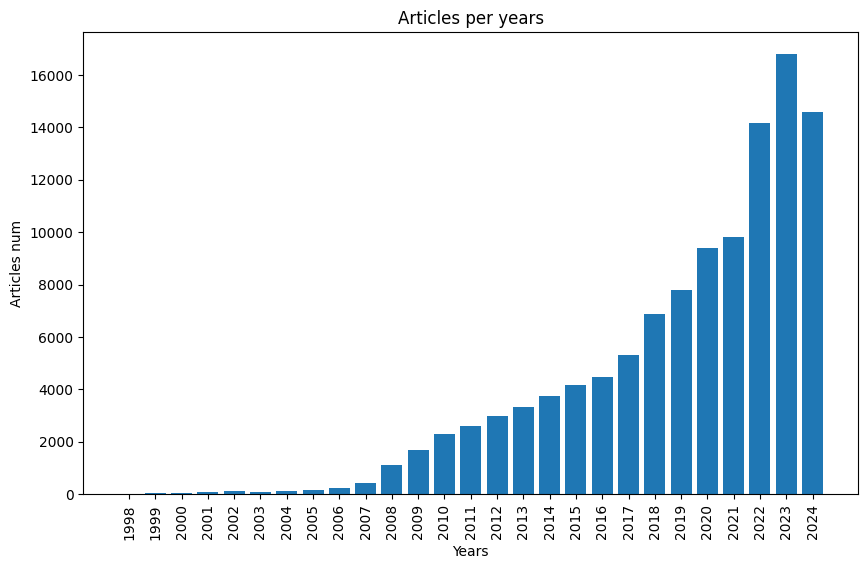

In [19]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Articles per years")
ax.set_xlabel("Years")
ax.set_ylabel("Articles num")
ax.bar(x, y, tick_label=x)
plt.xticks(rotation=90)
plt.plot()

## 3.  Vykreslete scatter graf zobrazující vztah mezi délkou článků a počtem komentářů

In [18]:
articles_lens = [len(text.split()) for text in df.text]
articles_comments = df.comments_num

[]

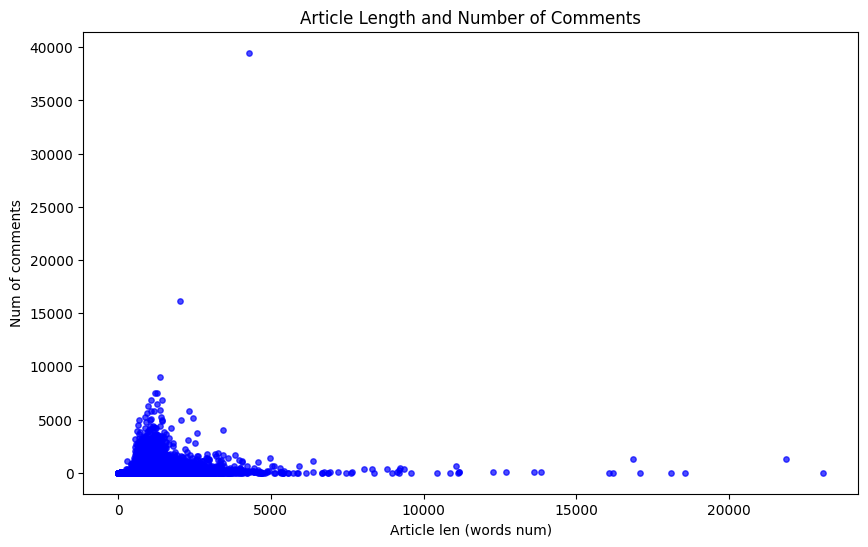

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(articles_lens, articles_comments, color='blue', alpha=0.7, s=15)
plt.title("Article Length and Number of Comments")
plt.xlabel("Article len (words num)")
plt.ylabel("Num of comments")
plt.plot()

## 4. Vykreslete koláčový graf zobrazující podíč článků v jednotlivých kategoriích

In [21]:
cats = [cat for cat_list in df.categories for cat in cat_list]
articles_per_cat_count = Counter(cats)
top_n = 20
top_categories = articles_per_cat_count.most_common(top_n)
top_categories_names = [cat[0] for cat in top_categories]
top_categories_counts = [cat[1] for cat in top_categories]

[]

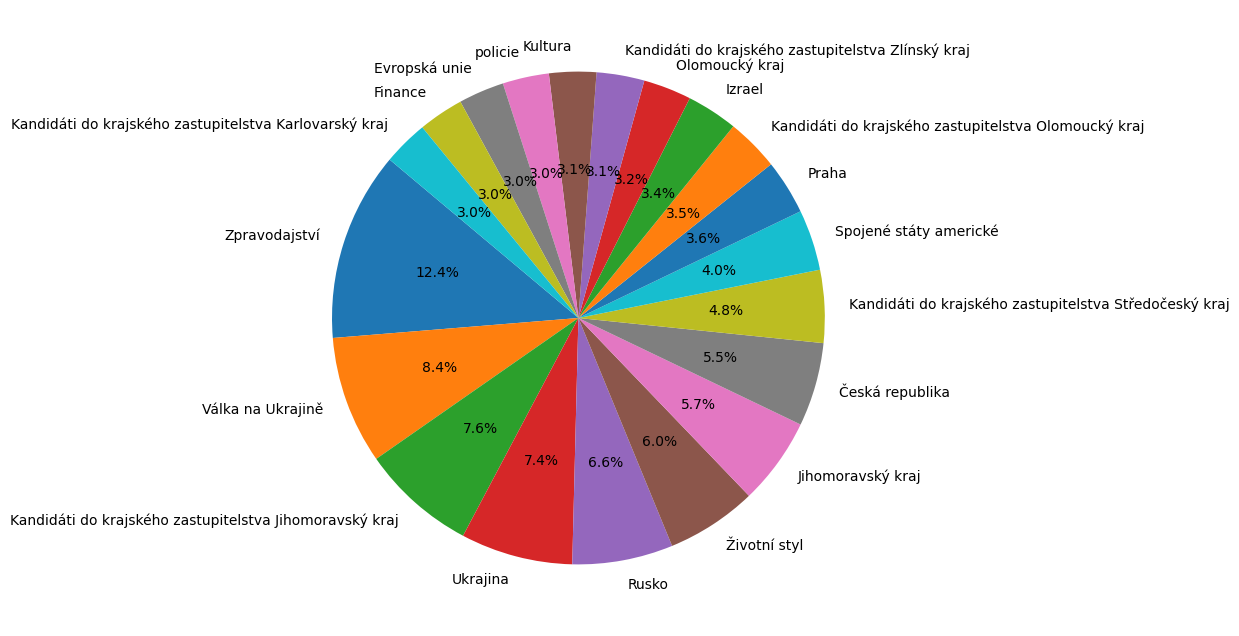

In [22]:
plt.figure(figsize=(14, 8))
plt.pie(top_categories_counts, labels=top_categories_names, autopct='%1.1f%%', startangle=140)
plt.plot()

## 5. Vykreslete histogram pro počet slov v článcích

In [25]:
articles_word_num = []
articles_word_len = []
for text in df.text:
    # 5
    words = re.findall(r'\b\w+\b', text.lower())
    articles_word_num.append(len(words))
    # 6
    lengthes = [len(w) for w in words]
    articles_word_len.append(sum(lengthes) / len(lengthes))

[]

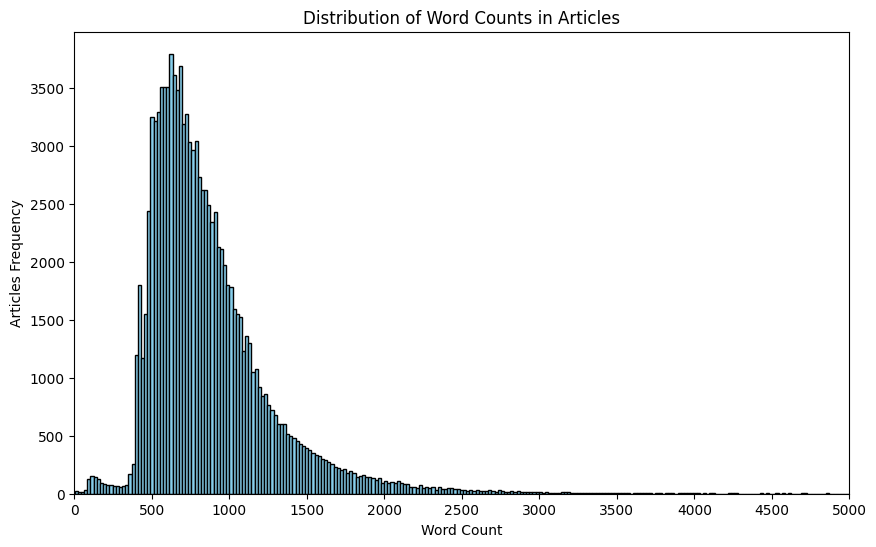

In [34]:
plt.figure(figsize=(10, 6))
plt.hist(articles_word_num, bins=len(articles_word_num) // 100, color='skyblue', edgecolor='black')
plt.xlim(0, 5000)
ticks = range(0, 5001, 500)
plt.xticks(ticks)
plt.title('Distribution of Word Counts in Articles')
plt.xlabel('Word Count')
plt.ylabel('Articles Frequency')
plt.plot()

## 6. Vykreslete histogram pro délku slov ve článcích

[]

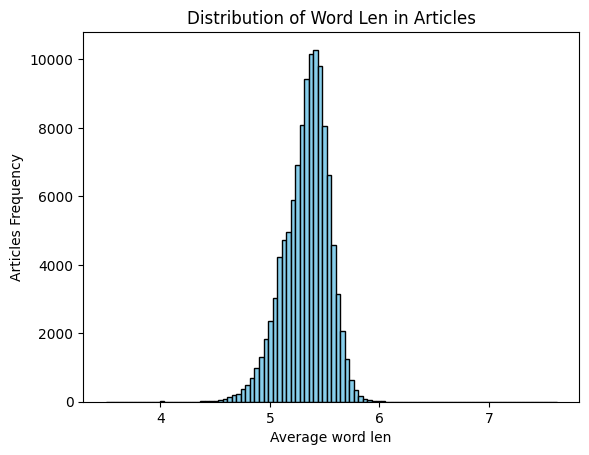

In [35]:
plt.figure()
plt.hist(articles_word_len, bins=100, color='skyblue', edgecolor='black')
plt.title('Distribution of Word Len in Articles')
plt.xlabel('Average word len')
plt.ylabel('Articles Frequency')
plt.plot()

## 7. Vykreslete časovou osu zobrazující výskyt slova koronavirus v názvu článků

In [60]:
df_clean = df.dropna(subset=['date'])
print(df_clean['date'].isna().any())

False


In [97]:
covid_words_by_date = defaultdict(int)

for _, row in df_clean.sort_values(by="date").iterrows():
    covid_words = len(re.findall(r'\bkoronavirus\b', row['text'].lower()))
    str_date = row['date'].year
    covid_words_by_date[str_date] += covid_words

sorted_covid_words = pd.DataFrame(list(covid_words_by_date.items()), columns=['date', 'covid_words_count'])

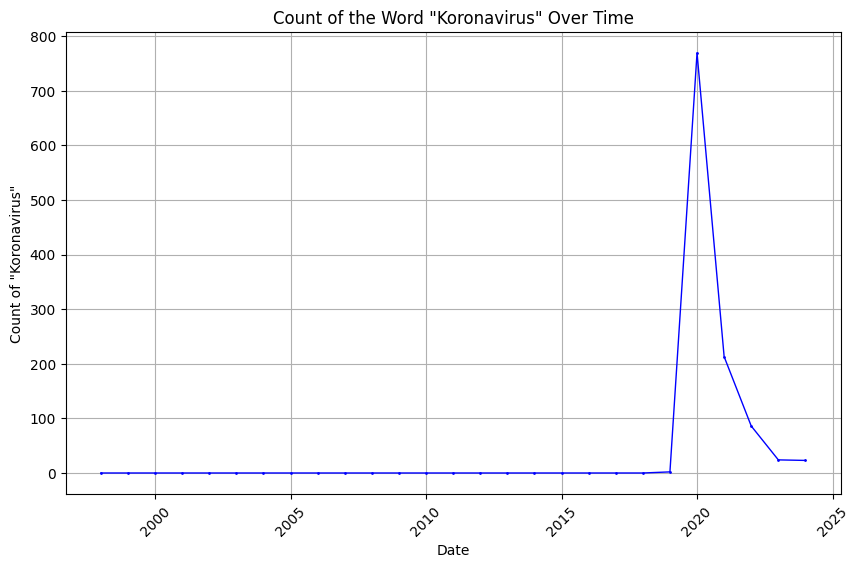

In [98]:
plt.figure(figsize=(10, 6))
plt.plot(sorted_covid_words['date'], sorted_covid_words['covid_words_count'], 
         marker='o', color='blue', linewidth=1, markersize=1)
plt.title('Count of the Word "Koronavirus" Over Time')
plt.xlabel('Date')
plt.ylabel('Count of "Koronavirus"')
plt.xticks(rotation=45)
plt.grid(True)